<a href="https://colab.research.google.com/github/cabamarcos/MNIST_MLP/blob/main/muinar06_act1_individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REDES NEURONALES

---



En esta actividad vamos a utilizar una red neuronal para clasificar imágenes de dígitos del 0 al 9 escritos a mano. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es MNIST, una base de datos constituida por (como no) imágenes de dígitos escritos a mano. Este dataset es ampliamente utilizado en docencia como punto de entrada al entrenamiento de redes neuronales y otros, pero también es muy utilizado en trabajos reales de investigación para el entrenamiento de imágenes. Puedes consultar más información sobre el dataset en [este enlace](https://es.wikipedia.org/wiki/Base_de_datos_MNIST).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas celdas si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados y que son perfectamente visibles en la versión PDF que debes entregar adjunta**. Por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch.

In [1]:
from keras.datasets.mnist import load_data
import tensorflow as tf
import matplotlib.pyplot as plt

Tenemos la suerte de que el dataset MNIST, el que vamos a utilizar en esta actividad, está guardado en Keras, por lo que podemos utilizarlo sin necesidad de buscar el dataset de forma externa.

In [2]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen los dígitos y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [3]:
(training_images, training_labels), (test_images, test_labels) = load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0 

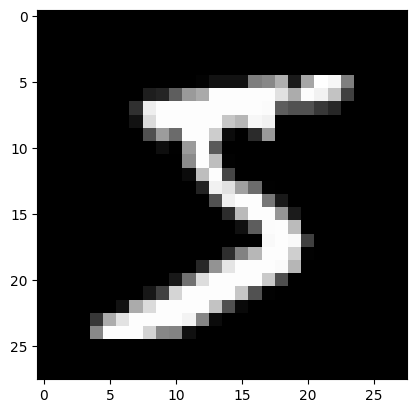

In [4]:
import numpy as np
np.set_printoptions(linewidth=200)
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [5]:
# Get the number of training and test images
num_training_images = training_images.shape[0]
num_test_images = test_images.shape[0]

# Print the results
print("Number of training images:", num_training_images)
print("Number of test images:", num_test_images)

Number of training images: 60000
Number of test images: 10000


In [6]:
print(training_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Son 60000 imágenes de train y 10000 de test y son representadas en una matriz de 28x28

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

In [7]:
# Print the shape and data type of the training images and labels
print("Training images shape:", training_images.shape)
print("Training images data type:", training_images.dtype)
print("Training labels shape:", training_labels.shape)
print("Training labels data type:", training_labels.dtype)

# Print the shape and data type of the test images and labels
print("Test images shape:", test_images.shape)
print("Test images data type:", test_images.dtype)
print("Test labels shape:", test_labels.shape)
print("Test labels data type:", test_labels.dtype)

Training images shape: (60000, 28, 28)
Training images data type: uint8
Training labels shape: (60000,)
Training labels data type: uint8
Test images shape: (10000, 28, 28)
Test images data type: uint8
Test labels shape: (10000,)
Test labels data type: uint8


Cada elemento del dataset es una imagen de 28x28 píxeles en escala de grises representada por una matriz de valores entre 0 y 255 como podemos ver en la matiz impresa que hay encima del ejericio 1.

La variable train o test labels contiene las etiquetas que son números del 0 al 9 representando los números que aparecen en la imagen.

## 2. Normalización y preprocesado de los datos

**Pregunta 2.1 (0.25 puntos)** Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. ¿Cómo lo podemos hacer?

In [8]:
training_images = training_images / 255.0
test_images = test_images / 255.0

Se normalizan dividiendo los valores de los píxeles entre 255. Esto ayuda a que la red neuronal entrene más eficientemente, evitando valores grandes que podrían dificultar la convergencia.

**Pregunta 2.2 (0.25 puntos)** Utiliza la función ***reshape*** de Numpy para convertir las imágenes en vectores de características de un tamaño de (N, 784). Explica con tus palabras por qué es necesario hacer esto.



In [9]:
training_images = training_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)

**Respuesta a la pregunta 2.2**:

las imágenes tienen 28x28 píxeles, los cuales son 784 si lo multiplicamos. Este será el numero de neuronas de entrada de nuestra red, por lo que tendremos que crear un vector con ese tamaño

**Pregunta 2.3 (0.25 puntos)** Para facilitar el desarrollo de la actividad, vamos a expresar las etiquetas así:

In [10]:
training_labels = tf.keras.utils.to_categorical(training_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

Muestra cómo son ahora los datos, como resultado de este cambio y también de los realizados en las dos preguntas anteriores. Debate cómo se beneficiará la red neuronal de todos estos cambios.

In [11]:
# Print the shape and data type of the training images and labels
print("Training images shape:", training_images.shape)
print("Training images data type:", training_images.dtype)
print("Training labels shape:", training_labels.shape)
print("Training labels data type:", training_labels.dtype)

# Print the shape and data type of the test images and labels
print("Test images shape:", test_images.shape)
print("Test images data type:", test_images.dtype)
print("Test labels shape:", test_labels.shape)
print("Test labels data type:", test_labels.dtype)

Training images shape: (60000, 784)
Training images data type: float64
Training labels shape: (60000, 10)
Training labels data type: float64
Test images shape: (10000, 784)
Test images data type: float64
Test labels shape: (10000, 10)
Test labels data type: float64


Respuesta a la pregunta 2.3:

La codificación one-hot convierte cada etiqueta en un vector donde la posición correspondiente a la clase es 1 y el resto son 0. Esto es necesario cuando usamos funciones de pérdida como categorical_crossentropy, que esperan esta representación. Facilita el aprendizaje de la red porque el error se calcula sobre todas las clases posibles.

## 3. Creación del Modelo

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy útiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas cómo eran las imágenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa (en problemas de clasificación de más de dos items)
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 3.1 (0.5 puntos)**. Utilizando Keras, y preparando los datos de X e Y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de MNIST con las siguientes características:

* Una capa de entrada del tamaño adecuado.
* Una capa oculta de 512 neuronas.
* Una capa final con 10 salidas.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(784,)),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Pregunta 3.2 (0.25 puntos)**: ¿crees conveniente utilizar una capa flatten en este caso? Motiva tu respuesta.



**Respuesta a la pregunta 3.2**:

No es necesario ya que hemos realizado la funcion reshape en los pasos anteriores

**Pregunta 3.3 (0.25 puntos)**: Utiliza la función summary() para mostrar la estructura de tu modelo.

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

## 4: Compilación y entrenamiento

**Pregunta 4.1 (0.5 puntos)**: Compila tu modelo. Utiliza ***categorical_crossentropy*** como función de pérdida, ***Adam*** como optimizador, y monitoriza la ***tasa de acierto*** durante el entrenamiento. Explica qué hace cada cosa en la compilación.

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


**Respuesta a la pregunta 4.1**:

**Pregunta 4.2 (0.5 puntos)**: Utiliza la función ***fit()*** para entrenar tu modelo. Para ayudarte en tu primer entrenamiento, utiliza estos valores:
*   epochs = 5
*   batch_size = 32
*   validation_split = 0.25



In [ ]:
model.fit(training_images, training_labels, epochs=5, batch_size=32, validation_split=0.25)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8875 - loss: 0.3798 - val_accuracy: 0.9566 - val_loss: 0.1401
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9712 - loss: 0.0945 - val_accuracy: 0.9723 - val_loss: 0.0933
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9832 - loss: 0.0556 - val_accuracy: 0.9739 - val_loss: 0.0861
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9885 - loss: 0.0373 - val_accuracy: 0.9736 - val_loss: 0.0874
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9925 - loss: 0.0255 - val_accuracy: 0.9739 - val_loss: 0.0945


# 5: Impacto al variar el número de neuronas en las capas ocultas

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por otros valores. Para ello, utiliza la red neuronal de la pregunta 3, y su capa oculta cambia el número de neuronas:

* **216 neuronas en la capa oculta
* **1024 neuronas en la capa oculta

y entrena la red en ambos casos.



In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(216, activation=tf.nn.relu, input_shape=(784,)),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model2.fit(training_images, training_labels, epochs=5, batch_size=32, validation_split=0.25)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8731 - loss: 0.4386 - val_accuracy: 0.9554 - val_loss: 0.1537
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9671 - loss: 0.1142 - val_accuracy: 0.9666 - val_loss: 0.1150
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9782 - loss: 0.0733 - val_accuracy: 0.9688 - val_loss: 0.1016
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9847 - loss: 0.0512 - val_accuracy: 0.9713 - val_loss: 0.0968
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9883 - loss: 0.0385 - val_accuracy: 0.9723 - val_loss: 0.0971


In [ ]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1024, activation=tf.nn.relu, input_shape=(784,)),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model3.fit(training_images, training_labels, epochs=5, batch_size=32, validation_split=0.25)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8941 - loss: 0.3506 - val_accuracy: 0.9633 - val_loss: 0.1232
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9732 - loss: 0.0862 - val_accuracy: 0.9711 - val_loss: 0.0942
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9848 - loss: 0.0502 - val_accuracy: 0.9713 - val_loss: 0.0916
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9890 - loss: 0.0340 - val_accuracy: 0.9755 - val_loss: 0.0838
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9929 - loss: 0.0212 - val_accuracy: 0.9703 - val_loss: 0.1121


**Pregunta 5.1 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal?

Al comparar las dos configuraciones, se observa que:

La red con 1024 neuronas en la capa oculta logra una mayor precisión de entrenamiento (99.29% vs. 98.83%) y una menor pérdida de entrenamiento, lo que indica que tiene mayor capacidad para aprender patrones complejos.

Sin embargo, en términos de precisión de validación, ambos modelos son muy similares. La red con 1024 neuronas llega a un máximo de 97.55%, mientras que la de 216 neuronas alcanza 97.23%.

Curiosamente, en la última época, la red con 1024 neuronas pierde rendimiento de validación (baja a 97.03%), mientras la de 216 se mantiene estable, lo que puede ser una señal temprana de overfitting.

Además, el modelo con más neuronas consume más tiempo de entrenamiento.

# 6: Número de neuronas de la capa de salida
Considerad la capa final, la de salida de la red neuronal de la pregunta 3.

**Pregunta 6.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**Pregunta 6.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10?

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [ ]:
model_5utput = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(784,)),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

model_5utput.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_5utput.fit(training_images, training_labels, epochs=5, batch_size=32, validation_split=0.25)

Epoch 1/5


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 10), output.shape=(None, 5)

Tu respuestas a la pregunta 6.1 aquí:

Tenemos 10 neuronas de salida debido a que el modelo debe clasificar entre 10 diferentes clases.

Tu respuestas a la pregunta 6.2 aquí:

El output nos muestra que el modelo tiene una capa de salida de 5 clases mientras que el dataset tiene 10, por lo que da un error.

# 7: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 3:

**Pregunta 7.1 (0.25 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**Pregunta 7.2 (0.25 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento.

**Pregunta 7.3 (0.25 puntos)**
* ¿Qué está pasando en la pregunta anterior? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [ ]:
model.fit(training_images, training_labels, epochs=15, batch_size=32, validation_split=0.25)

Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9935 - loss: 0.0205 - val_accuracy: 0.9680 - val_loss: 0.1136
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9939 - loss: 0.0178 - val_accuracy: 0.9782 - val_loss: 0.0890
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9966 - loss: 0.0112 - val_accuracy: 0.9752 - val_loss: 0.1111
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9953 - loss: 0.0139 - val_accuracy: 0.9755 - val_loss: 0.1055
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9969 - loss: 0.0086 - val_accuracy: 0.9784 - val_loss: 0.1029
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9974 - loss: 0.0080 - val_accuracy: 0.9727 - val_loss: 0.1405
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9972 - loss: 0.0088 - val_accuracy: 0.9773 - val_loss: 0.1188
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9986 - loss: 0.0

In [ ]:
model.fit(training_images, training_labels, epochs=30, batch_size=32, validation_split=0.25)

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9994 - loss: 0.0024 - val_accuracy: 0.9773 - val_loss: 0.1501
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9982 - loss: 0.0052 - val_accuracy: 0.9767 - val_loss: 0.1629
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9982 - loss: 0.0054 - val_accuracy: 0.9799 - val_loss: 0.1367
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9985 - loss: 0.0047 - val_accuracy: 0.9777 - val_loss: 0.1473
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9989 - loss: 0.0029 - val_accuracy: 0.9735 - val_loss: 0.1806
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9985 - loss: 0.0059 - val_accuracy: 0.9759 - val_loss: 0.1637
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9985 - loss: 0.0046 - val_accuracy: 0.9779 - val_loss: 0.1616
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9990 - loss: 0.00

Tu respuesta a la pregunta 7.3 aquí:

Aumentar la cantidad de épocas mejora la precisión del modelo sobre los datos de entrenamiento, pero no necesariamente mejora su capacidad para generalizar. En este experimento:

- Con 15 epochs, el modelo alcanza una precisión de entrenamiento del 99.85%, pero la precisión de validación se estabiliza en torno al 97.8%, incluso bajando en algunas épocas.

- Con 30 epochs, aunque la precisión de entrenamiento es muy alta (99.94%), la pérdida de validación aumenta (hasta 0.24) y la precisión de validación no mejora significativamente, permaneciendo cerca del 97.6%.

Esto indica que el modelo comienza a sobreajustarse (overfitting) ya que aprende demasiado bien los datos de entrenamiento, pero pierde capacidad para generalizar a nuevos datos.

# 8: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del código de ejemplo, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [ ]:
### Ejemplo de código

# class myCallback(tf.keras.callbacks.Callback):
#       def on_epoch_end(self, epoch, logs={}):
#         if(logs.get('accuracy')> 0.85):
#               print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
#               self.model.stop_training = True

# callback de perdida
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('loss') < 0.03:
      print(f"\n🛑 Pérdida menor a 0.03 alcanzada en la época {epoch + 1}. Se detiene el entrenamiento.")
      self.model.stop_training = True

**Pregunta 8.1. *(0.75 puntos)***: Consulta la documentación de Keras y aprende cómo podemos utilizar Early stop en nuestro modelos.

In [ ]:
callbacks = myCallback()
model.fit(training_images, training_labels, epochs=30, batch_size=32, validation_split=0.25, callbacks=[callbacks])


Epoch 1/30
1380/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9941 - loss: 0.0187
🛑 Pérdida menor a 0.03 alcanzada en la época 1. Se detiene el entrenamiento.
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9941 - loss: 0.0188 - val_accuracy: 0.9681 - val_loss: 0.1195


## 9. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Pregunta 9.1 *(0.75 puntos)***: Utilizando la red realizada en el ejercicio 3, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

In [ ]:
model_sigmoid = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='sigmoid', input_shape=(784,)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_sigmoid.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_sigmoid = model_sigmoid.fit(training_images, training_labels, epochs=10, batch_size=32, validation_split=0.25)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7991 - loss: 0.6834 - val_accuracy: 0.9362 - val_loss: 0.2114
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9446 - loss: 0.1840 - val_accuracy: 0.9545 - val_loss: 0.1519
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9626 - loss: 0.1184 - val_accuracy: 0.9649 - val_loss: 0.1183
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9760 - loss: 0.0805 - val_accuracy: 0.9688 - val_loss: 0.1041
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9822 - loss: 0.0566 - val_accuracy: 0.9733 - val_loss: 0.0916
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9894 - loss: 0.0390 - val_accuracy: 0.9744 - val_loss: 0.0869
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9910 - loss: 0.0299 - val_accuracy: 0.9737 - val_loss: 0.0911
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9930 - loss: 0.0209 - 

In [ ]:
model_relu = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_relu.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_relu = model_relu.fit(training_images, training_labels, epochs=10, batch_size=32, validation_split=0.25)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8915 - loss: 0.3560 - val_accuracy: 0.9648 - val_loss: 0.1131
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9736 - loss: 0.0833 - val_accuracy: 0.9640 - val_loss: 0.1221
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9828 - loss: 0.0551 - val_accuracy: 0.9715 - val_loss: 0.1022
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9864 - loss: 0.0396 - val_accuracy: 0.9731 - val_loss: 0.0971
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9913 - loss: 0.0267 - val_accuracy: 0.9725 - val_loss: 0.1046
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9917 - loss: 0.0253 - val_accuracy: 0.9741 - val_loss: 0.1113
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9917 - loss: 0.0250 - val_accuracy: 0.9718 - val_loss: 0.1247
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9937 - loss: 0.0182 - 

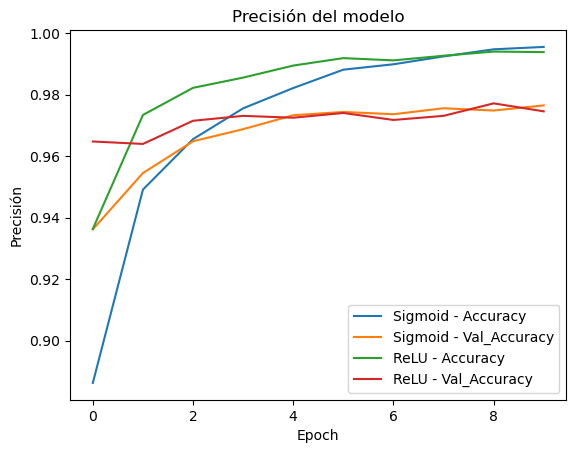

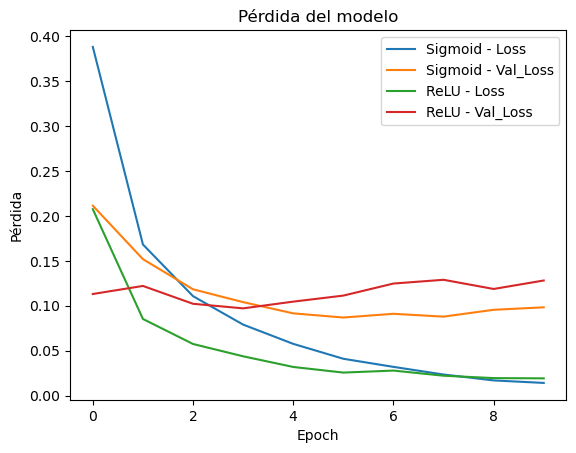

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de precisión
plt.plot(history_sigmoid.history['accuracy'], label='Sigmoid - Accuracy')
plt.plot(history_sigmoid.history['val_accuracy'], label='Sigmoid - Val_Accuracy')
plt.plot(history_relu.history['accuracy'], label='ReLU - Accuracy')
plt.plot(history_relu.history['val_accuracy'], label='ReLU - Val_Accuracy')
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Gráfico de pérdida
plt.plot(history_sigmoid.history['loss'], label='Sigmoid - Loss')
plt.plot(history_sigmoid.history['val_loss'], label='Sigmoid - Val_Loss')
plt.plot(history_relu.history['loss'], label='ReLU - Loss')
plt.plot(history_relu.history['val_loss'], label='ReLU - Val_Loss')
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Velocidad de convergencia: En general, ReLU converge más rápido que sigmoid. Esto se debe a que la derivada de ReLU es constante para valores positivos, lo que evita el problema de la "desaparición del gradiente" que puede ocurrir con sigmoid.

Métricas obtenidas: ReLU suele obtener mejores resultados en términos de precisión y otras métricas. Esto se debe a su mejor capacidad para aprender representaciones no lineales complejas.

## 10. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Pregunta 10.1 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

In [ ]:
from tensorflow.keras.initializers import Zeros

model_zeros = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,), kernel_initializer=Zeros()),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=Zeros())
])

model_zeros.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_zeros = model_zeros.fit(
    training_images, training_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1114 - loss: 2.3020 - val_accuracy: 0.1050 - val_loss: 2.3018
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1118 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 2.3020
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1118 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 2.3021
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1120 - loss: 2.3014 - val_accuracy: 0.1050 - val_loss: 2.3020
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1147 - loss: 2.3008 - val_accuracy: 0.1050 - val_loss: 2.3019
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1151 - loss: 2.3007 - val_accuracy: 0.1050 - val_loss: 2.3019
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1123 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 2.3021
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1130 - loss: 2.3010 - val_accuracy: 0.

El modelo no aprende nada ya qyue todas las neuronas reciben los mismos gradientes y permanecen iguales sin mejorar la precisión con las épocas.

In [ ]:
from tensorflow.keras.initializers import RandomNormal

model_normal = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.05)),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05))
])

model_normal.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_normal = model_normal.fit(
    training_images, training_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8508 - loss: 0.5254 - val_accuracy: 0.9657 - val_loss: 0.1269
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9615 - loss: 0.1322 - val_accuracy: 0.9748 - val_loss: 0.0871
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9772 - loss: 0.0786 - val_accuracy: 0.9773 - val_loss: 0.0776
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9849 - loss: 0.0556 - val_accuracy: 0.9817 - val_loss: 0.0688
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9893 - loss: 0.0404 - val_accuracy: 0.9797 - val_loss: 0.0715
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9920 - loss: 0.0289 - val_accuracy: 0.9805 - val_loss: 0.0679
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9942 - loss: 0.0220 - val_accuracy: 0.9825 - val_loss: 0.0640
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9966 - loss: 0.0148 - val_accuracy: 0.

El modelo sí entrena, pero puede llegar a tardar más o ser inestable. Si los valores iniciales son demasiado grandes o pequeños, los gradientes pueden explotar o desaparecer, especialmente con ReLU.

In [ ]:
model_glorot = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_glorot.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_glorot = model_glorot.fit(
    training_images, training_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8613 - loss: 0.4955 - val_accuracy: 0.9647 - val_loss: 0.1258
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9636 - loss: 0.1259 - val_accuracy: 0.9735 - val_loss: 0.0942
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9781 - loss: 0.0763 - val_accuracy: 0.9778 - val_loss: 0.0796
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9851 - loss: 0.0538 - val_accuracy: 0.9798 - val_loss: 0.0705
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9899 - loss: 0.0372 - val_accuracy: 0.9795 - val_loss: 0.0693
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9932 - loss: 0.0273 - val_accuracy: 0.9815 - val_loss: 0.0670
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9950 - loss: 0.0204 - val_accuracy: 0.9800 - val_loss: 0.0690
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9963 - loss: 0.0151 - val_accuracy: 0.

Esta es la inicialización que se hace por defecto. Es la más balanceada y eficiente para redes densas con ReLU. Se espera buena convergencia desde las primeras épocas.

## 11. Optimizadores

**Problema 11.1 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de RMSprop es buena idea dejar los valores por defecto provistos por Keras).

### SGD (Stochastic Gradient Descent)

In [ ]:
from tensorflow.keras.optimizers import SGD

model_sgd = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_sgd.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

history_sgd = model_sgd.fit(
    training_images, training_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/10


c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6072 - loss: 1.5821 - val_accuracy: 0.8808 - val_loss: 0.5986
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8586 - loss: 0.6058 - val_accuracy: 0.9030 - val_loss: 0.4086
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8850 - loss: 0.4563 - val_accuracy: 0.9148 - val_loss: 0.3433
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8927 - loss: 0.4006 - val_accuracy: 0.9198 - val_loss: 0.3097
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9010 - loss: 0.3711 - val_accuracy: 0.9237 - val_loss: 0.2881
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9072 - loss: 0.3423 - val_accuracy: 0.9270 - val_loss: 0.2725
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9102 - loss: 0.3239 - val_accuracy: 0.9285 - val_loss: 0.2606
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9128 - loss: 0.3149 - val_accuracy: 0.9310 - val_

Tiene un aprendizaje más lento, por lo que puede requerir más épocas. Es sensible a la tasa de aprendizaje.

### RMSprop

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model_rmsprop = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_rmsprop.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

history_rmsprop = model_rmsprop.fit(
    training_images, training_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8631 - loss: 0.4678 - val_accuracy: 0.9647 - val_loss: 0.1308
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9626 - loss: 0.1274 - val_accuracy: 0.9740 - val_loss: 0.0960
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9781 - loss: 0.0751 - val_accuracy: 0.9775 - val_loss: 0.0733
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9843 - loss: 0.0529 - val_accuracy: 0.9807 - val_loss: 0.0665
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9879 - loss: 0.0411 - val_accuracy: 0.9793 - val_loss: 0.0683
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9907 - loss: 0.0323 - val_accuracy: 0.9803 - val_loss: 0.0672
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9936 - loss: 0.0229 - val_accuracy: 0.9820 - val_loss: 0.0602
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9956 - loss: 0.0164 - val_accuracy: 0.

Tiene un entrenamiento rápido y estable. Bueno para problemas con ruido o muchas características.

### Adam

In [ ]:
from tensorflow.keras.optimizers import Adam

model_adam = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_adam.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history_adam = model_adam.fit(
    training_images, training_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8647 - loss: 0.4834 - val_accuracy: 0.9643 - val_loss: 0.1280
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9633 - loss: 0.1292 - val_accuracy: 0.9728 - val_loss: 0.0928
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9771 - loss: 0.0806 - val_accuracy: 0.9780 - val_loss: 0.0756
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9842 - loss: 0.0544 - val_accuracy: 0.9808 - val_loss: 0.0697
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9890 - loss: 0.0385 - val_accuracy: 0.9803 - val_loss: 0.0682
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9919 - loss: 0.0298 - val_accuracy: 0.9803 - val_loss: 0.0672
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9942 - loss: 0.0223 - val_accuracy: 0.9820 - val_loss: 0.0639
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9971 - loss: 0.0137 - val_accuracy: 0.

Adam combina lo mejor de SGD con momento y adaptabilidad. Es el más robusto y eficiente para la mayoría de los casos, ofreciendo alta precisión en menos épocas.

## 12. Regularización y red final *(1.25 puntos)*

**Problema 12.1 *(2 puntos)***: Entrenar una red final que sea capaz de obtener una accuracy en el validation superior al 95%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

Tras probas muchos modelos con diferente número de neuronas, capas ocultas y diferentes métodos de dropout u optimizadores y he llegado a la conclusión de que este dataset es muy sencillo, por lo que se puede llegar a un buen porcentaje de aciertos sin complicar mucho el modelo.

Como modelo final he creado uno que probase los diferentes métodos probados en este notebook y explicados en clase. He utilizado dos capas ocultas densas con activación relu y regularización L2, para estabilizar el aprendizaje. Apliqué dropaut 0.3 y 0.5 en las capas ocultaas para reducir el sobreajuste y BatchNormalization para estabilizar el aprendizaje. Empleé Adam por su velocidad en la convergencia y utilicé EarlyStopping sobre la pérdida en validación, deteniendo el entrenamiento si no había mejoras sobre tres épocas consecutivas.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_final = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l2(0.001), input_shape=(784,)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

model_final.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history_final = model_final.fit(
    training_images, training_labels,
    epochs=30,
    batch_size=128,
    validation_split=0.1,
    callbacks=[early_stop]
)


Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8337 - loss: 1.2988 - val_accuracy: 0.9673 - val_loss: 0.6203
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9481 - loss: 0.6153 - val_accuracy: 0.9732 - val_loss: 0.4150
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9582 - loss: 0.4397 - val_accuracy: 0.9738 - val_loss: 0.3316
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9597 - loss: 0.3597 - val_accuracy: 0.9772 - val_loss: 0.2819
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9624 - loss: 0.3146 - val_accuracy: 0.9725 - val_loss: 0.2661
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9633 - loss: 0.2928 - val_accuracy: 0.9732 - val_loss: 0.2658
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9619 - loss: 0.2908 - val_accuracy: 0.9738 - val_loss: 0.2507
Epoch 8/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9662 - loss: 0.2695 - val_accuracy: 0.

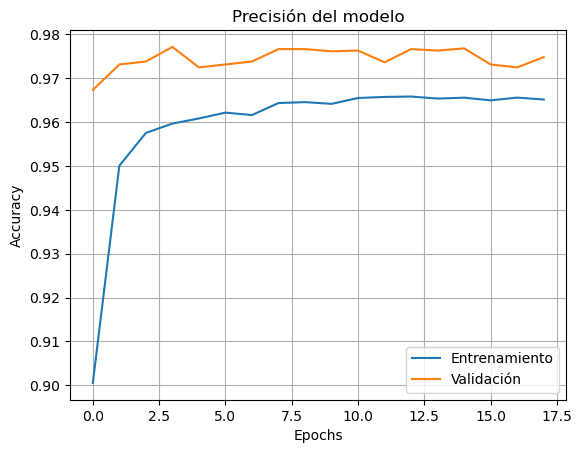

In [ ]:
import matplotlib.pyplot as plt

# Gráfica de precisión
plt.plot(history_final.history['accuracy'], label='Entrenamiento')
plt.plot(history_final.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Como podemos ver, aunque el objetivo de precisión ya se cumplió con modelos anteriores, este modelo también superó el objetivo de 95% de precisión en validación, alcanzando picos del 97.7%.

La precisión de entrenamiento se mantuvo cercana al 96.6–96.9%, mientras que la precisión de validación se estabilizó entre 97.2% y 97.7%, mostrando un buen equilibrio sin sobreajuste.

La pérdida de validación disminuyó progresivamente hasta estabilizarse alrededor de 0.21, lo cual indica una buena capacidad de generalización.

La gráfica muestra que no hay una divergencia significativa entre entrenamiento y validación, lo cual refuerza que las técnicas de regularización aplicadas fueron efectivas.